## Download the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.shape

(200, 5)

In [6]:
data.size

1000

## visualizations

<AxesSubplot:xlabel='Age'>

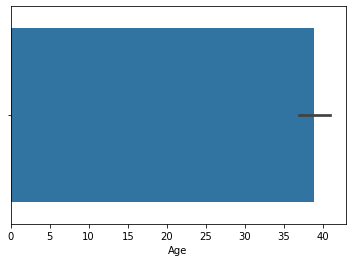

In [7]:
sns.barplot(data.Age)

<AxesSubplot:ylabel='Frequency'>

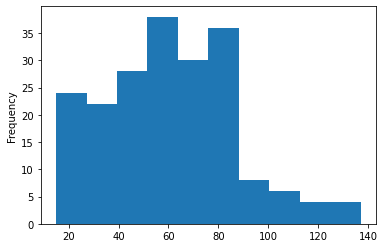

In [8]:
data["AnnualIncome"].plot(kind='hist')


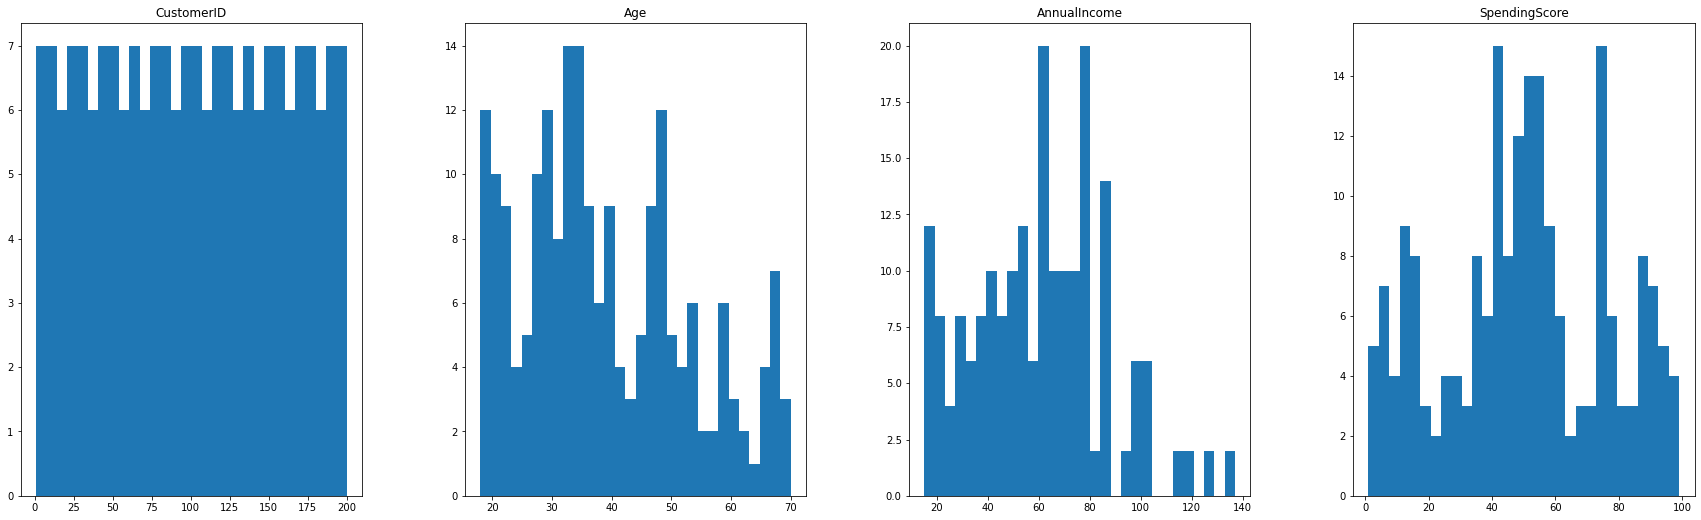

In [9]:
data.hist(figsize=(30,20), grid=False, layout=(2,4), bins=30)
plt.show()

### bivariate analysis 

<AxesSubplot:xlabel='Age', ylabel='AnnualIncome'>

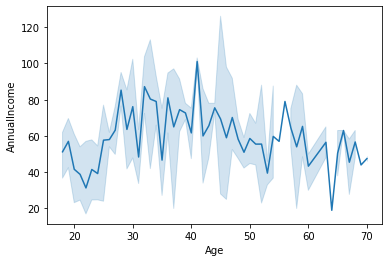

In [10]:
sns.lineplot(x=data.Age, y=data.AnnualIncome)

<AxesSubplot:xlabel='CustomerID', ylabel='Age'>

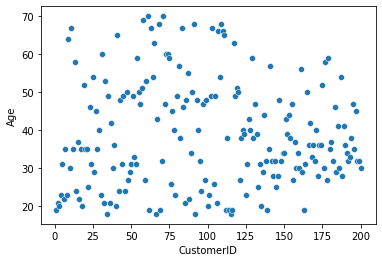

In [11]:
sns.scatterplot(data.CustomerID,data.Age)

<AxesSubplot:xlabel='AnnualIncome', ylabel='SpendingScore'>

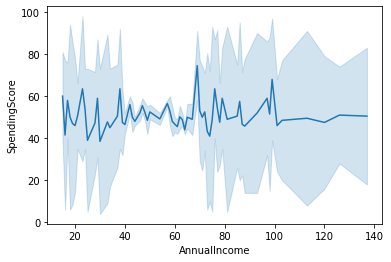

In [12]:
sns.lineplot(x=data.AnnualIncome, y=data.SpendingScore)

<AxesSubplot:xlabel='SpendingScore', ylabel='AnnualIncome'>

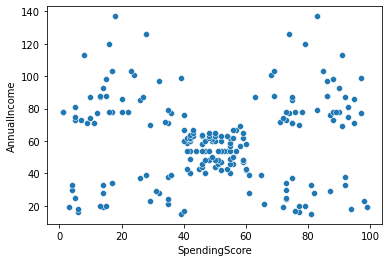

In [13]:
sns.scatterplot(x=data.SpendingScore, y=data.AnnualIncome)

<AxesSubplot:xlabel='Age', ylabel='Gender'>

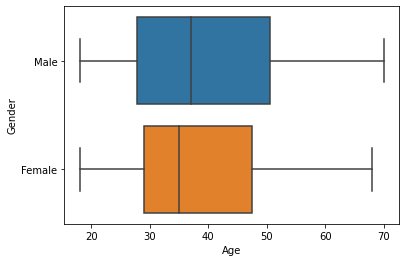

In [14]:
sns.boxplot(y=data.Gender,x=data.Age)

## multivariate

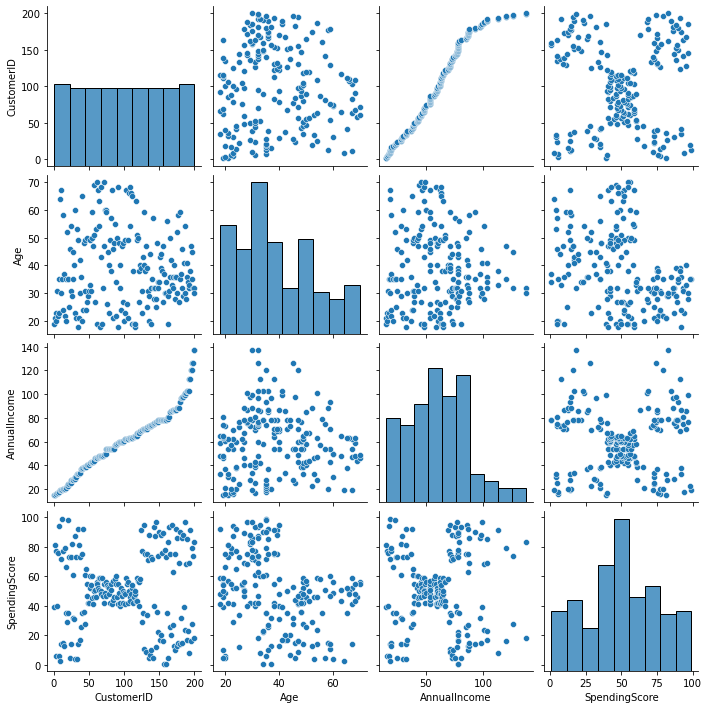

In [15]:
sns.pairplot(data)

## Perform descriptive statistics on the dataset.

In [16]:
data.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
data.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

## Missing values and deal with them

In [18]:
data.isna().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

##  Find the outliers and replace the outliers

In [19]:
data.skew()

CustomerID       0.000000
Age              0.485569
AnnualIncome     0.321843
SpendingScore   -0.047220
dtype: float64

<AxesSubplot:xlabel='Age'>

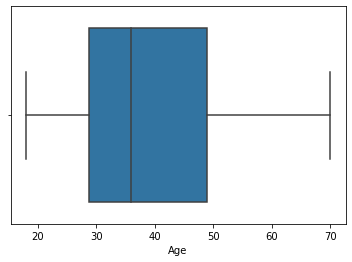

In [20]:
sns.boxplot(data.Age)

<AxesSubplot:xlabel='AnnualIncome'>

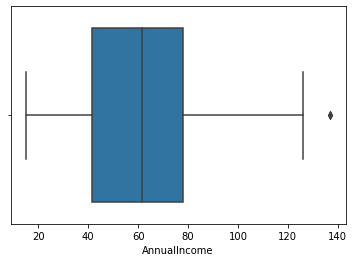

In [21]:
sns.boxplot(data["AnnualIncome"])

In [22]:
df=data["AnnualIncome"].quantile(0.99)

In [23]:
df

126.1099999999999

<AxesSubplot:xlabel='SpendingScore'>

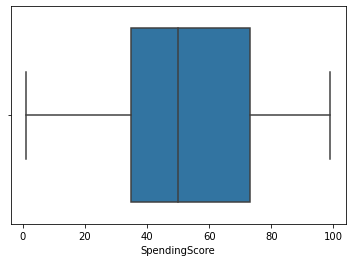

In [24]:
sns.boxplot(data["SpendingScore"])

## Check for Categorical columns and perform encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## scaling Data

In [26]:
from sklearn.preprocessing import scale
data=pd.DataFrame(scale(data),columns=data.columns)

In [27]:
data.head(20)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980
5,-1.636808,-0.886405,-1.209269,-1.662660,1.001596
6,-1.619488,-0.886405,-0.276302,-1.624491,-1.715913
7,-1.602167,-0.886405,-1.137502,-1.624491,1.700384
8,-1.584846,1.128152,1.804932,-1.586321,-1.832378
9,-1.567526,-0.886405,-0.635135,-1.586321,0.846310


In [28]:
x=data.drop(columns=['Gender','Age'])
print(x)

     CustomerID  AnnualIncome  SpendingScore
0     -1.723412     -1.738999      -0.434801
1     -1.706091     -1.738999       1.195704
2     -1.688771     -1.700830      -1.715913
3     -1.671450     -1.700830       1.040418
4     -1.654129     -1.662660      -0.395980
..          ...           ...            ...
195    1.654129      2.268791       1.118061
196    1.671450      2.497807      -0.861839
197    1.688771      2.497807       0.923953
198    1.706091      2.917671      -1.250054
199    1.723412      2.917671       1.273347

[200 rows x 3 columns]


In [29]:
S=scale(x)
print(S)


[[-1.7234121  -1.73899919 -0.43480148]
 [-1.70609137 -1.73899919  1.19570407]
 [-1.68877065 -1.70082976 -1.71591298]
 [-1.67144992 -1.70082976  1.04041783]
 [-1.6541292  -1.66266033 -0.39597992]
 [-1.63680847 -1.66266033  1.00159627]
 [-1.61948775 -1.62449091 -1.71591298]
 [-1.60216702 -1.62449091  1.70038436]
 [-1.5848463  -1.58632148 -1.83237767]
 [-1.56752558 -1.58632148  0.84631002]
 [-1.55020485 -1.58632148 -1.4053405 ]
 [-1.53288413 -1.58632148  1.89449216]
 [-1.5155634  -1.54815205 -1.36651894]
 [-1.49824268 -1.54815205  1.04041783]
 [-1.48092195 -1.54815205 -1.44416206]
 [-1.46360123 -1.54815205  1.11806095]
 [-1.4462805  -1.50998262 -0.59008772]
 [-1.42895978 -1.50998262  0.61338066]
 [-1.41163905 -1.43364376 -0.82301709]
 [-1.39431833 -1.43364376  1.8556706 ]
 [-1.3769976  -1.39547433 -0.59008772]
 [-1.35967688 -1.39547433  0.88513158]
 [-1.34235616 -1.3573049  -1.75473454]
 [-1.32503543 -1.3573049   0.88513158]
 [-1.30771471 -1.24279661 -1.4053405 ]
 [-1.29039398 -1.24279661

## clustering

In [30]:
from sklearn.cluster import KMeans

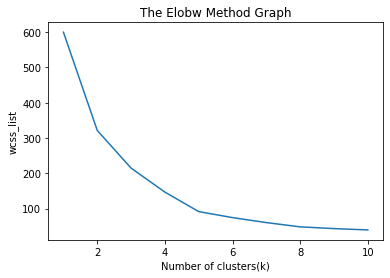

In [31]:
wcss_list= []    
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show() 

## cluster primary dataset

In [32]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
cluster= kmeans.fit_predict(S)

In [33]:
cluster

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

## Split the data into dependent and independent variables.

In [34]:
x=data.drop(columns=['AnnualIncome'],axis=1)
print(x)

y=data['AnnualIncome']
y

     CustomerID    Gender       Age  SpendingScore
0     -1.723412  1.128152 -1.424569      -0.434801
1     -1.706091  1.128152 -1.281035       1.195704
2     -1.688771 -0.886405 -1.352802      -1.715913
3     -1.671450 -0.886405 -1.137502       1.040418
4     -1.654129 -0.886405 -0.563369      -0.395980
..          ...       ...       ...            ...
195    1.654129 -0.886405 -0.276302       1.118061
196    1.671450 -0.886405  0.441365      -0.861839
197    1.688771  1.128152 -0.491602       0.923953
198    1.706091  1.128152 -0.491602      -1.250054
199    1.723412  1.128152 -0.635135       1.273347

[200 rows x 4 columns]


0     -1.738999
1     -1.738999
2     -1.700830
3     -1.700830
4     -1.662660
         ...   
195    2.268791
196    2.497807
197    2.497807
198    2.917671
199    2.917671
Name: AnnualIncome, Length: 200, dtype: float64

In [35]:
## split the data into the training and testing


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3,random_state = 1 )

In [37]:
x_train.shape

(140, 4)

In [38]:
x_train

,CustomerID,Gender,Age,SpendingScore
116,0.285792,-0.886405,1.733166,-0.279515
67,-0.562924,-0.886405,2.091999,-0.085407
78,-0.372396,-0.886405,-1.137502,0.069879
42,-0.995942,1.128152,0.656665,-0.551266
17,-1.428960,1.128152,-1.352802,0.613381
...,...,...,...,...
133,0.580244,-0.886405,-0.563369,0.807488
137,0.649527,1.128152,-0.491602,0.885132
72,-0.476320,-0.886405,1.517865,-0.046586
140,0.701489,-0.886405,1.302565,-1.754735


In [39]:
x_test.shape

(60, 4)

In [40]:
x_test

,CustomerID,Gender,Age,SpendingScore
58,-0.718810,-0.886405,-0.850435,0.031057
40,-1.030583,-0.886405,1.876699,-0.590088
34,-1.134507,-0.886405,0.728432,-1.405340
102,0.043302,1.128152,2.020232,0.341630
184,1.463601,-0.886405,0.154298,-0.434801
198,1.706091,1.128152,-0.491602,-1.250054
95,-0.077943,1.128152,-1.065735,0.069879
4,-1.654129,-0.886405,-0.563369,-0.395980
29,-1.221111,-0.886405,-1.137502,1.428633
168,1.186470,-0.886405,-0.204535,-0.900660


## build and train the model

In [41]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [42]:
pred = reg.predict(x_test)

In [43]:
pred

array([-0.71619152, -0.95847353, -1.07783485,  0.06077754,  1.39680988,
        1.61018785, -0.11568981, -1.60517836, -1.20842497,  1.12585177,
        1.14811778, -1.35048097, -1.49181122, -0.16815515,  0.1917191 ,
        0.3150373 ,  0.96127798, -1.11082323,  0.60901597, -0.67100357,
       -0.83431554, -1.39958205, -0.91387904, -0.11024697, -1.17605904,
        0.99601621, -1.03170733, -1.19270467,  1.53440506, -1.2299543 ,
       -0.8981889 ,  1.06912818,  1.57466055,  1.24714496,  1.28253267,
       -0.06873609,  1.25026653, -0.42090807, -0.52591187,  1.185504  ,
        0.16409944,  0.12711239,  1.4660296 , -1.43594333, -0.71503197,
       -1.35888508,  0.20088492, -1.0449915 ,  1.38016029,  0.37673262,
       -0.0302422 ,  0.36479698,  0.3281882 , -0.76405861, -1.1590764 ,
        1.28871187,  1.3274017 ,  0.13623561,  1.61454973,  0.59694903])

## performance

In [44]:
from sklearn.metrics import r2_score
score = r2_score(pred,y_test)

In [45]:
score

0.923427414975786

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mean_squared_error = mean_squared_error(pred,y_test)
Root_mean_squared_error = np.sqrt(mean_squared_error)
mean_bsolute_error= mean_absolute_error(pred,y_test)
accuracy= reg.score(x_test,y_test)

In [47]:
mean_squared_error
Root_mean_squared_error
mean_absolute_error
accuracy

0.9359120924073403